In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data={'height':[2,132,4,5,None,90,7],'weight':[4,8,16,7,None,2,9],'color':['brown','white','brown',None,'brown','white','black'],'age':[2,12,3,4,6,1,5],'alive':['no','no','yes','yes','yes','no','yes']}
df=pd.DataFrame(data)
df

,height,weight,color,age,alive
0,2.0,4.0,brown,2,no
1,132.0,8.0,white,12,no
2,4.0,16.0,brown,3,yes
3,5.0,7.0,None,4,yes
4,NaN,NaN,brown,6,yes
5,90.0,2.0,white,1,no
6,7.0,9.0,black,5,yes


In [15]:
df.dropna(inplace=True)
df

,height,weight,color,age,alive
0,2.0,4.0,brown,2,no
1,132.0,8.0,white,12,no
2,4.0,16.0,brown,3,yes
5,90.0,2.0,white,1,no
6,7.0,9.0,black,5,yes


In [16]:
h_mean=df['height'].mean()
df['height'].fillna(h_mean,inplace=True)
h_mean

47.0

In [17]:
c_mode=df['color'].mode()[0]
df['color'].fillna(c_mode,inplace=True)
c_mode

'brown'

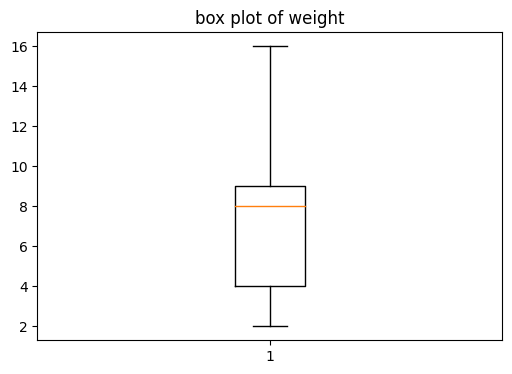

In [18]:
plt.figure(figsize=(6,4))
plt.boxplot(df['weight'])
plt.title("box plot of weight")
plt.show()

In [19]:
q1=df['weight'].quantile(0.25)
q1
q3=df['weight'].quantile(0.75)
q3
iqr=q3-q1
iqr
df=df[(df['weight']>=q1-(1.5*iqr))]
df

,height,weight,color,age,alive
0,2.0,4.0,brown,2,no
1,132.0,8.0,white,12,no
2,4.0,16.0,brown,3,yes
5,90.0,2.0,white,1,no
6,7.0,9.0,black,5,yes


In [24]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,KBinsDiscretizer

In [28]:
scaler=StandardScaler()
df['height']=scaler.fit_transform(df[['height']])
df['height']

0   -0.834249
1    1.575804
2   -0.797172
5    0.797172
6   -0.741555
Name: height, dtype: float64

In [29]:
label_encoder=LabelEncoder()
df['alive']=label_encoder.fit_transform(df['alive'])
df['alive']

0    0
1    0
2    1
5    0
6    1
Name: alive, dtype: int32

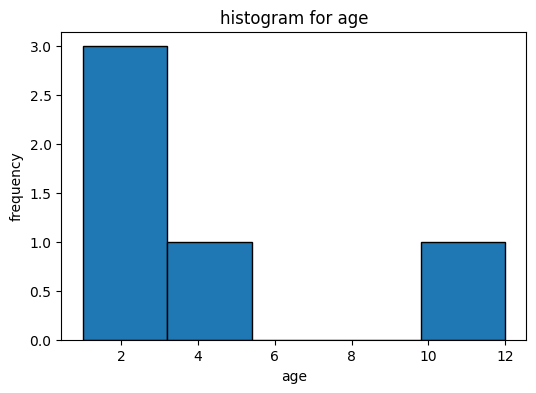

In [31]:
plt.figure(figsize=(6,4))
plt.hist(df['age'],bins=5,edgecolor='k')
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("histogram for age")
plt.show()

In [36]:
discetizer=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
df['age_discretized']=discetizer.fit_transform(df[['age']])
df['age_discretized']

/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0    0.0
1    2.0
2    0.0
5    0.0
6    1.0
Name: age_discretized, dtype: float64

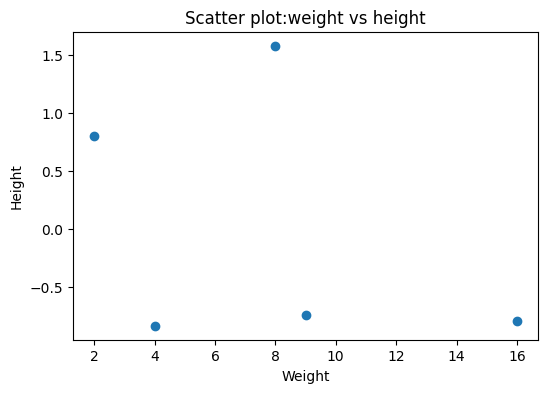

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(df['weight'],df['height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Scatter plot:weight vs height")
plt.show()